In [57]:
from datetime import datetime
import os
import numpy as np

In [58]:
# load the data from the file
path = 'logs'

# hard code the file name
# file_name_prefix = '2023-11-09_19_27_30' # sim results ?
# file_name_prefix = '2023-11-09_21_03_36' # sim results ?

# file_name_prefix = '2023-12-04_14_45_44' # run 1 (testbed) discarded
# file_name_prefix = '2023-12-13_12_33_02' # run 1 (testbed) 
# file_name_prefix = '2023-12-13_14_28_47' # run 2 (testbed)
file_name_prefix = '2023-12-13_16_15_36' # run 3 (testbed)


power_file_suffix = '_power_log.txt'
quality_file_suffix = '_quality_log.txt'

file_name = file_name_prefix + power_file_suffix
file_name_quality = file_name_prefix + quality_file_suffix

print('file_name: \t\t', file_name)
print('file_name_quality: \t', file_name_quality)

file_name: 		 2023-12-13_16_15_36_power_log.txt
file_name_quality: 	 2023-12-13_16_15_36_quality_log.txt


In [59]:
# Load Data, set the date format, and parse the data into 3 lists (time, D, and Power)
date_format = '%Y-%m-%d %H:%M:%S.%f'
line_length = 53 # invalid data check

# print the full path to the file and check if it exists
if file_name is not None:
    file_path = f'{path}//{file_name}'
    print("looking for:", file_path)
    if os.path.exists(file_path):
        print("file exists")
    else:
        # error out if the file does not exist
        raise FileNotFoundError(f'file: {file_path} does not exist')

# load the data from the file
if file_name is not None:
    # parse the data into a 3 list (time, D, and Power)
    time = []
    D = []
    Power = []
    with open(f'{path}//{file_name}') as f:
        """Read the data from the text file and parse it into 3 lists"""
        # line example: [2023-05-11 10:41:58.959252] 0000000       -17.85234
        for ii,line in enumerate(f):
            # check if the line length is valid (ie it should be 52 characters long)
            if len(line) != line_length:
                print(f"Invalid line length: {len(line)} @ {ii+1}")
                continue # skip the line if it is not valid
            else:
                line = line.split("]") # split the line into 2 parts at the ']' character
                # remove the "[" character from the time string
                line[0] = line[0][1:]
                # split the second part of the line into 2 (pairwise) parts at the ' ' character and append the first part of the line
                line = [line[0],*line[1].split()]
                # convert the time string into a datetime object
                line[0] = datetime.strptime(line[0], date_format) # +23-08-09_16_12_39.070044
                # convert the D string into an integer
                line[1] = int(line[1])
                # convert the Power string into a float remove the newline character
                line[2] = float(line[2])
                # append the parsed data to the lists
                time.append(line[0])
                D.append(line[1])
                Power.append(line[2])
                # print(line)
            # break # remove this line to parse the entire file

    print("lines loaded:", len(time))
    print("Finished parsing the data")


looking for: logs//2023-12-13_16_15_36_power_log.txt
file exists
lines loaded: 21057
Finished parsing the data


In [60]:
# quality file

# print the full path to the file and check if it exists
if file_name_quality is not None:
    file_path = f'{path}//{file_name_quality}'
    print("looking for:", file_path)
    if os.path.exists(file_path):
        print("file exists")
    else:
        # error out if the file does not exist
        raise FileNotFoundError(f'file: {file_path} does not exist')

# load the data from the file
if file_name_quality is not None:
    # parse the data into a 3 list (time, D, and Power)
    time_q = []
    D = []
    Quality = []
    with open(f'{path}//{file_name_quality}') as f:
        """Read the data from the text file and parse it into 3 lists"""
        # line example: [2023-05-11 10:41:58.959252] 0000000       -17.85234
        for ii,line in enumerate(f):
            # check if the line length is valid (ie it should be 52 characters long)
            if len(line) != line_length:
                print(f"Invalid line length: {len(line)} @ {ii+1}")
                continue # skip the line if it is not valid
            else:
                line = line.split("]") # split the line into 2 parts at the ']' character
                # remove the "[" character from the time string
                line[0] = line[0][1:]
                # split the second part of the line into 2 (pairwise) parts at the ' ' character and append the first part of the line
                line = [line[0],*line[1].split()]
                # convert the time string into a datetime object
                line[0] = datetime.strptime(line[0], date_format) # +23-08-09_16_12_39.070044
                # convert the D string into an integer
                line[1] = int(line[1])
                # convert the Power string into a float remove the newline character
                line[2] = float(line[2])
                # append the parsed data to the lists
                time_q.append(line[0])
                D.append(line[1])
                Quality.append(line[2])
                # print(line)
            # break # remove this line to parse the entire file

    print("lines loaded:", len(time_q))

looking for: logs//2023-12-13_16_15_36_quality_log.txt
file exists
lines loaded: 21057


In [61]:
# show the first element of time and quality time
print("time[0]: ", time[0])
print("time_q[0]: ", time_q[0])

time[0]:  2023-12-13 16:15:49.169530
time_q[0]:  2023-12-13 16:15:49.169527


In [62]:
# find the avg time between all the power data
timestamps = np.array([datetime.timestamp() for datetime in time])
timestamps_q = np.array([datetime.timestamp() for datetime in time_q])
diff = np.diff(timestamps)
diff_q = np.diff(timestamps_q)
print("avg time between power data: ", np.mean(diff))
print("avg time between quality data: ", np.mean(diff_q))

avg time between power data:  0.032760151976147685
avg time between quality data:  0.032760152112024536


Text(0.5, 1.0, '2023-11-09_19_27_30_power_log.txt')

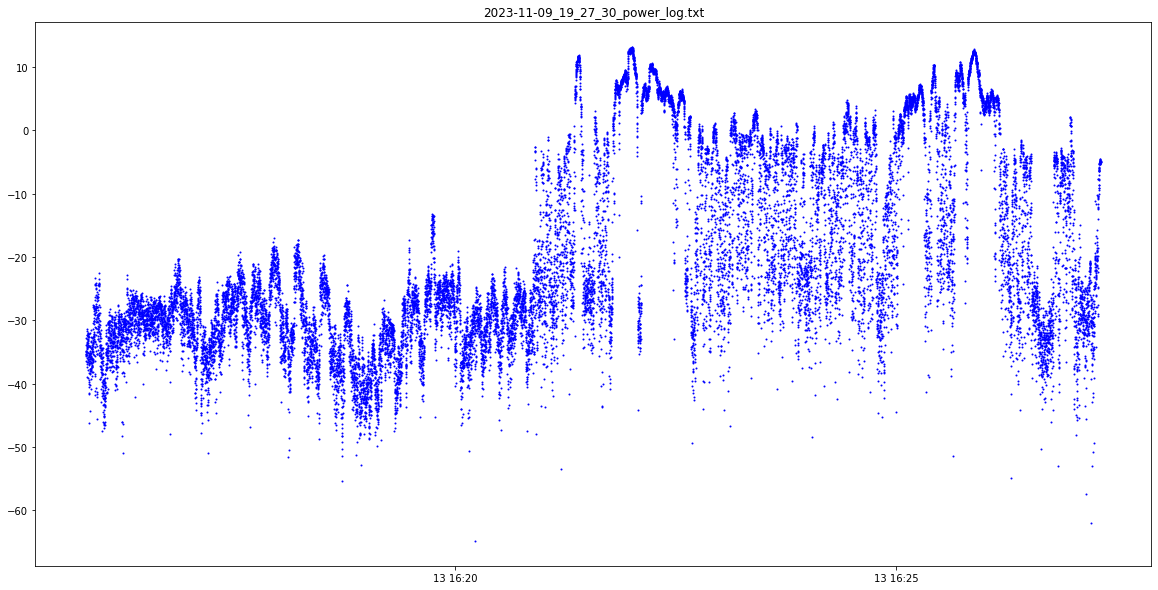

In [63]:
# plot the data
import matplotlib.pyplot as plt
# set the plot size
plt.figure(figsize=(20,10))
# plot the data as a scatter plot
# plt.scatter(time, Power, marker='o', s=1, color='blue')

''''moving average'''
# num_points = 500
# plt.plot(time, np.convolve(Power, np.ones(num_points)/num_points, mode='same'), color='red')
# plt.plot(time, filtered_power_moving_avg, color='red')
'''FIR AND IIR'''
# plt.scatter(time, filtered_power_IIR, marker='o', s=1, color='green')
# plt.scatter(time, filtered_power_FIR, marker='o', s=1, color='orange')
'''median'''
#plt.scatter(time, filtered_power_median, marker='o', s=1, color='purple')

'''hampel'''
# plt.plot(time, filtered_power_hampel, alpha=0.2,color='orange')
# plt.plot(time, sigmas, color='red') # plot the sigmas
# plot the values replaced by the hampel filter as outliers
# for i in indices:
#     plt.scatter(time[i], filtered_power_hampel[i], marker='o', s=5, color='red')

'''ensemble'''
# plt.scatter(time, filtered_power_ensemble, marker='o', s=1, color='black')
# plt.plot(time, sigmas_ensemble, color='red')

'''kalman'''
#plt.scatter(time, filtered_power_kalman, marker='o', s=1, color='red')
plt.scatter(time, Power, marker='o', s=1, color='blue')

# set the plot title
#if not set above then use the file name
if 'title' not in locals():
    title = file_name
plt.title(title)
# if save_figure:
#     plt.savefig(f'{path}/{path}.png', dpi=150)

In [64]:
import plotly.express as px

# use the 'px.scatter' function to create the scatter plot
# time on the x-axis, Power on the y-axis
plyfig = px.scatter(x=time, y=Power,
                    color=Power, 
                    color_continuous_scale='Bluered',
                    title='Power vs Time',
                    )
# change the size of the markers
# plyfig.update_traces(marker=dict(size=2,
#                                   line=dict(width=2,
#                                             color='DarkSlateGrey')),
#                      selector=dict(mode='markers'))
# add quality data
plyfig.add_scatter(x=time_q, y=Quality,
                    mode='markers',
                    name='Quality',
                    marker=dict(size=2,
                                color='black',
                                ),
                    )

# # plot the varience of the quality and power data
# plyfig.add_scatter(x=time, y=qvar,
#                     mode='markers',
#                     name='Quality Varience',
#                     marker=dict(size=2,
#                                 color='red',
#                                 ),
#                     )
# plyfig.add_scatter(x=time, y=pvar,
#                     mode='markers',
#                     name='Power Varience',
#                     marker=dict(size=2,
#                                 color='orange',
#                                 ),
#                     )

plyfig.update_layout(
    xaxis_title="Time",
    yaxis_title="Power (dB)",
    legend_title="Legend Title",
    
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),

    # font=dict(
    #     family="Courier New, monospace",
    #     size=18,
    #     color="RebeccaPurple"
    # )
)

# save the plot as an HTML file
plyfig.write_html(f'{path}/{file_name_prefix}.html')

plyfig.show()
